In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
import pandas as pd
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/flu.csv'
df = pd.read_csv(url)
df

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.00,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.00,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.00,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,COVID19,NaN,1.40,NaN,NaN,9.2,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478,COVID19,NaN,0.83,NaN,NaN,14.8,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,COVID19,NaN,3.00,NaN,NaN,15.0,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,COVID19,NaN,4.00,NaN,NaN,6.6,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


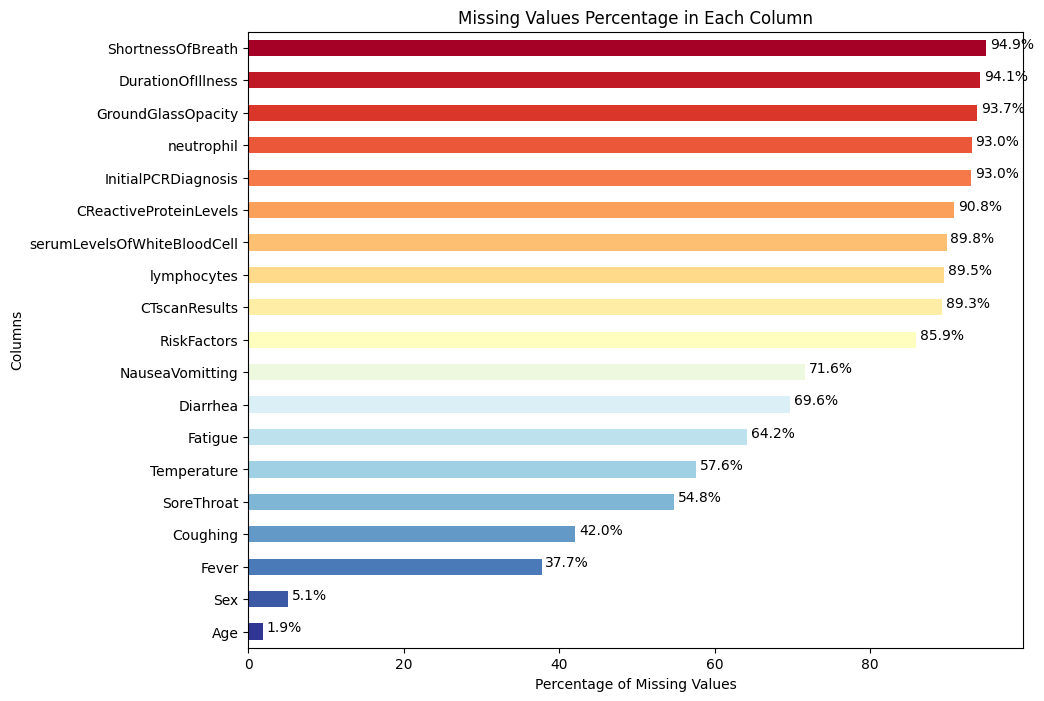

In [23]:
# Plot missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages = missing_percentages[missing_percentages > 0]
missing_percentages = missing_percentages.sort_values(ascending=True)

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(missing_percentages)))

plt.figure(figsize=(10, 8))
missing_percentages.plot(kind='barh', color=colors)
plt.title('Missing Values Percentage in Each Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')

for i, v in enumerate(missing_percentages):
    plt.text(v + 0.5, i, f'{v:.1f}%')


In [24]:
# Drop features with missing values above 85%
missing_percentages = (df.isnull().sum() / len(df)) * 100
features_to_drop = missing_percentages[missing_percentages > 85].index.tolist()

print(f"Features to drop (>85% missing): {features_to_drop}")
df_cleaned = df.drop(columns=features_to_drop)

print(f"Original dataframe shape: {df.shape}")
print(f"Cleaned dataframe shape: {df_cleaned.shape}")

df = df_cleaned


Features to drop (>85% missing): ['InitialPCRDiagnosis', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'CReactiveProteinLevels', 'DurationOfIllness', 'CTscanResults', 'RiskFactors', 'GroundGlassOpacity', 'ShortnessOfBreath']
Original dataframe shape: (1482, 20)
Cleaned dataframe shape: (1482, 10)


In [25]:
# Drop rows with missing values in 'Age' or 'Sex'
df = df.dropna(subset=['Age', 'Sex'])
print(f"Dataframe shape after dropping rows with missing Age or Sex: {df.shape}")


Dataframe shape after dropping rows with missing Age or Sex: (1392, 10)


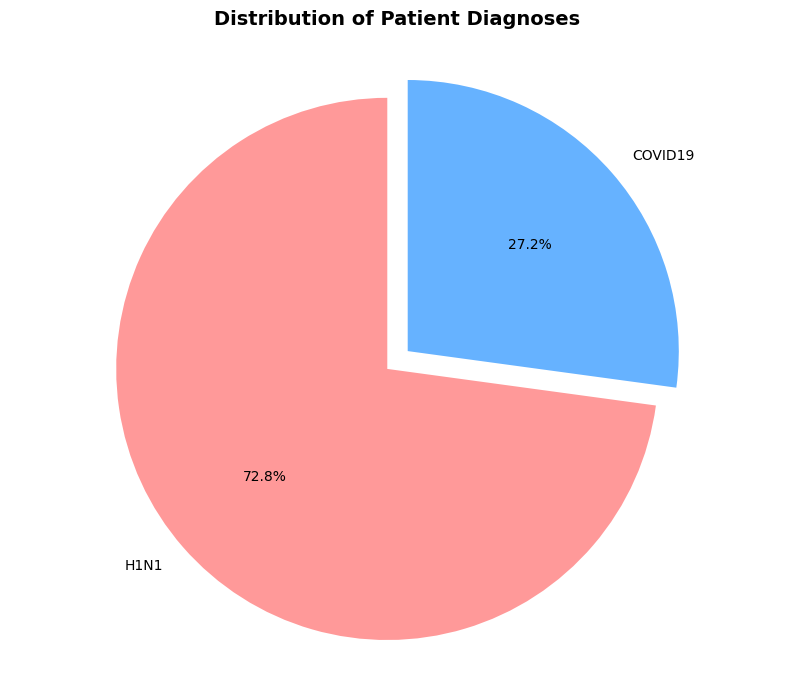

In [26]:
# Plot Diagnosis
diagnosis_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.pie(diagnosis_counts, 
        labels=diagnosis_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        shadow=False,
        startangle=90,
        explode=[0.05] * len(diagnosis_counts))

plt.title('Distribution of Patient Diagnoses', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')

plt.axis('equal')
plt.show()



Diagnosis
Diagnosis
H1N1       1014
COVID19     378
Name: count, dtype: int64

Sex
Sex
M    743
F    649
Name: count, dtype: int64

Diarrhea
Diarrhea
No     340
Yes    109
Name: count, dtype: int64

Fever
Fever
Yes    771
No     144
Name: count, dtype: int64

Coughing
Coughing
Yes    739
No     113
Name: count, dtype: int64

SoreThroat
SoreThroat
Yes    404
No     262
Name: count, dtype: int64

NauseaVomitting
NauseaVomitting
No     319
Yes    102
Name: count, dtype: int64

Fatigue
Fatigue
Yes    348
No     183
Name: count, dtype: int64



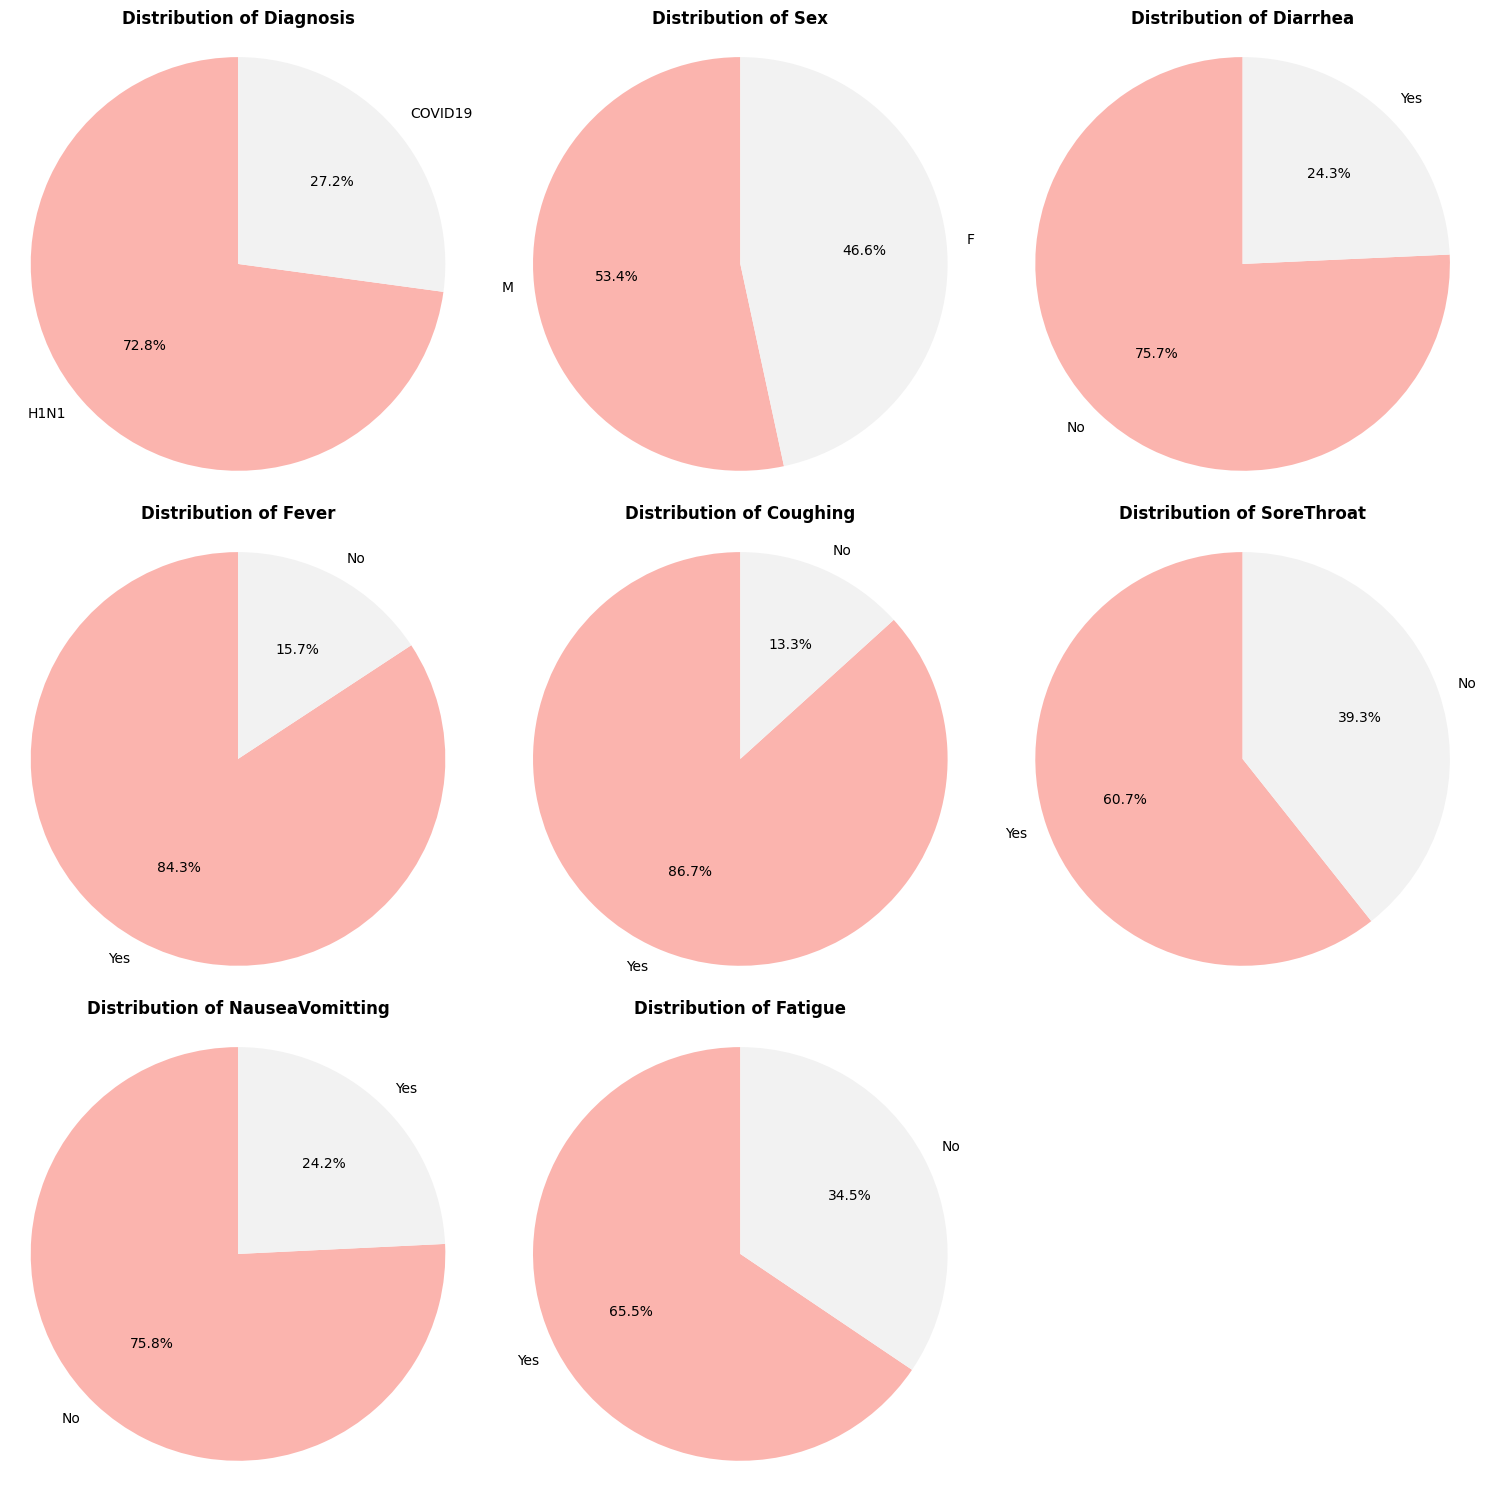

In [27]:
# Get columns with object data type
object_columns = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

plot_count = 0

for column in object_columns:
    if df[column].nunique() > 10 or df[column].count() == 0:
        continue
    
    value_counts = df[column].value_counts().dropna()
    
    if len(value_counts) > 0 and plot_count < 9: 
        ax = axes[plot_count]
        colors = plt.cm.Pastel1(np.linspace(0, 1, len(value_counts)))
        
        ax.pie(value_counts, 
               labels=value_counts.index,
               autopct='%1.1f%%',
               colors=colors,
               shadow=False,
               startangle=90)
        
        ax.set_title(f'Distribution of {column}', 
                    pad=10, 
                    fontsize=12, 
                    fontweight='bold')
        
        ax.axis('equal')
        plot_count += 1
        
        print(f"{column}")
        print(value_counts)
        print()

for i in range(plot_count, 9):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [28]:
# Replace missing values in symptom columns with 'No'
symptoms = ['Diarrhea', 'Fever', 'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue']
for symptom in symptoms:
    df.loc[:, symptom] = df[symptom].fillna('No')

# Print results after replacement
for symptom in symptoms:
    print(f"{symptom} values after replacement:")
    print(df[symptom].value_counts())
    print(f"Missing values in {symptom} column: {df[symptom].isna().sum()}")
    print()

Diarrhea values after replacement:
Diarrhea
No     1283
Yes     109
Name: count, dtype: int64
Missing values in Diarrhea column: 0

Fever values after replacement:
Fever
Yes    771
No     621
Name: count, dtype: int64
Missing values in Fever column: 0

Coughing values after replacement:
Coughing
Yes    739
No     653
Name: count, dtype: int64
Missing values in Coughing column: 0

SoreThroat values after replacement:
SoreThroat
No     988
Yes    404
Name: count, dtype: int64
Missing values in SoreThroat column: 0

NauseaVomitting values after replacement:
NauseaVomitting
No     1290
Yes     102
Name: count, dtype: int64
Missing values in NauseaVomitting column: 0

Fatigue values after replacement:
Fatigue
No     1044
Yes     348
Name: count, dtype: int64
Missing values in Fatigue column: 0



Diagnosis
Diagnosis
H1N1       1014
COVID19     378
Name: count, dtype: int64

Sex
Sex
M    743
F    649
Name: count, dtype: int64

Diarrhea
Diarrhea
No     1283
Yes     109
Name: count, dtype: int64

Fever
Fever
Yes    771
No     621
Name: count, dtype: int64

Coughing
Coughing
Yes    739
No     653
Name: count, dtype: int64

SoreThroat
SoreThroat
No     988
Yes    404
Name: count, dtype: int64

NauseaVomitting
NauseaVomitting
No     1290
Yes     102
Name: count, dtype: int64

Fatigue
Fatigue
No     1044
Yes     348
Name: count, dtype: int64



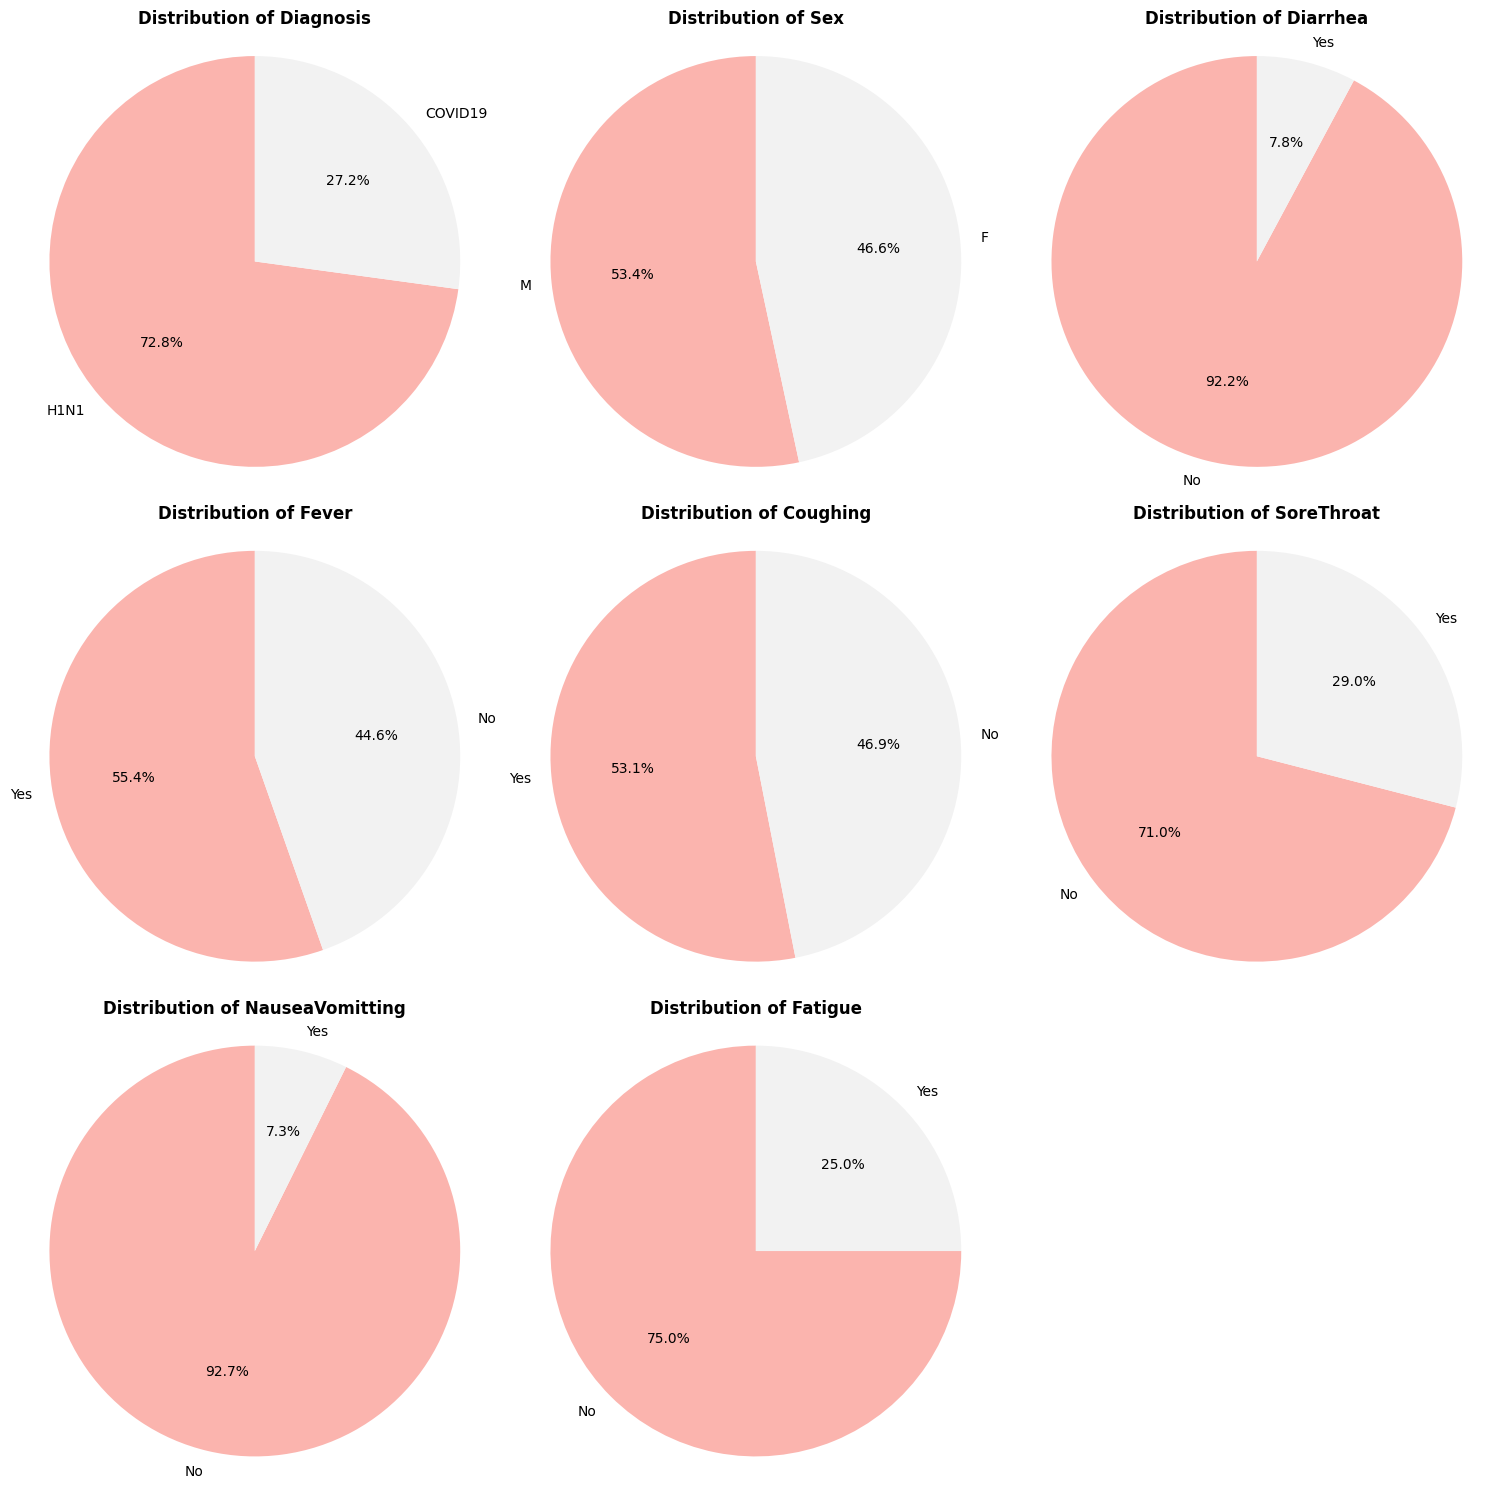

In [29]:
object_columns = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

plot_count = 0

for column in object_columns:
    if df[column].nunique() > 10 or df[column].count() == 0:
        continue
    
    value_counts = df[column].value_counts().dropna()
    
    if len(value_counts) > 0 and plot_count < 9: 
        ax = axes[plot_count]
        colors = plt.cm.Pastel1(np.linspace(0, 1, len(value_counts)))
        
        ax.pie(value_counts, 
               labels=value_counts.index,
               autopct='%1.1f%%',
               colors=colors,
               shadow=False,
               startangle=90)
        
        ax.set_title(f'Distribution of {column}', 
                    pad=10, 
                    fontsize=12, 
                    fontweight='bold')
        
        ax.axis('equal')
        plot_count += 1
        
        print(f"{column}")
        print(value_counts)
        print()

for i in range(plot_count, 9):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


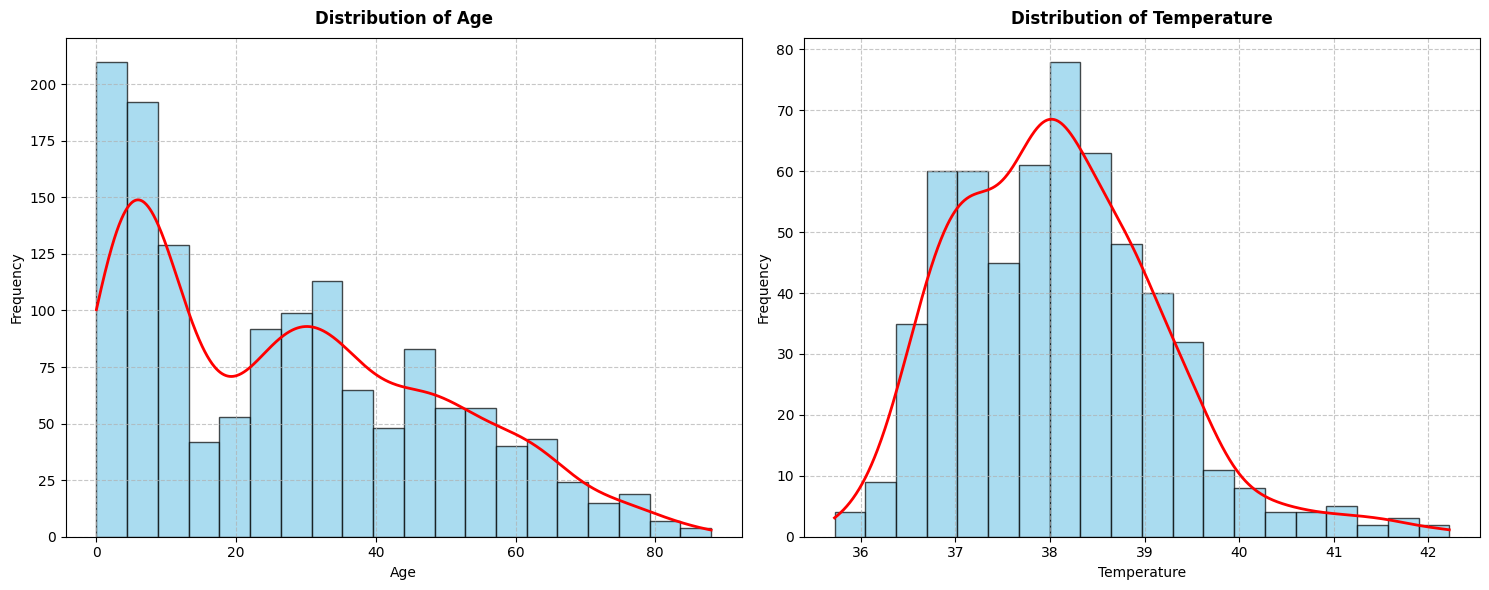

In [30]:
from scipy import stats
import numpy as np

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_numeric_columns = len(numeric_columns)

if num_numeric_columns <= 2:
    fig, axes = plt.subplots(1, num_numeric_columns, figsize=(15, 6))
    if num_numeric_columns == 1:
        axes = [axes]
else:
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

plot_count = 0

for column in numeric_columns:
    if plot_count < len(axes):
        ax = axes[plot_count]
        
        n, bins, patches = ax.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        
        density = stats.gaussian_kde(df[column].dropna())
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        y = density(x) * len(df[column].dropna()) * (bins[1] - bins[0])
        ax.plot(x, y, 'r-', lw=2)
        
        ax.set_title(f'Distribution of {column}', 
                    pad=10, 
                    fontsize=12, 
                    fontweight='bold')
        
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
        ax.grid(True, linestyle='--', alpha=0.7)
        
        plot_count += 1

if num_numeric_columns > 2:
    for i in range(plot_count, len(axes)):
        axes[i].axis('off')

plt.tight_layout()
plt.show()


In [31]:
# Replace missing values in the numeric columns with the median
for column in numeric_columns:
    median_value = df[column].median()
    df.loc[:, column] = df[column].fillna(median_value)


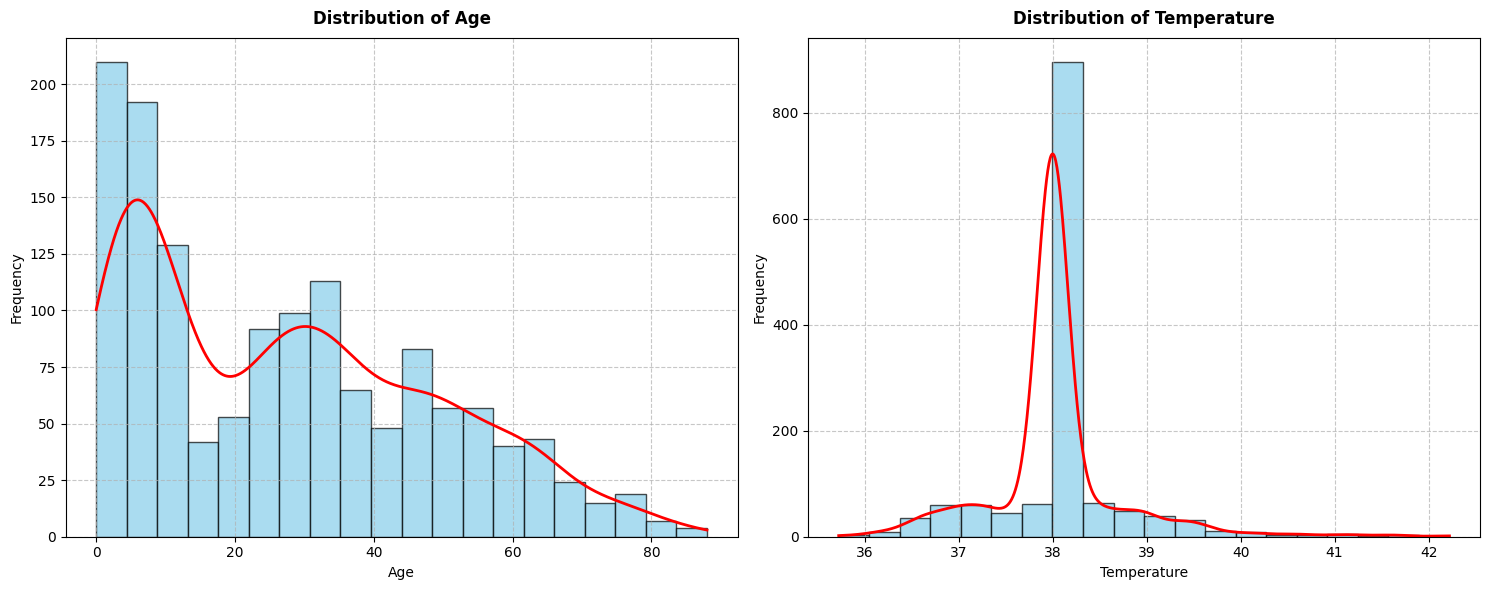

In [32]:
from scipy import stats
import numpy as np

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_numeric_columns = len(numeric_columns)

if num_numeric_columns <= 2:
    fig, axes = plt.subplots(1, num_numeric_columns, figsize=(15, 6))
    if num_numeric_columns == 1:
        axes = [axes]
else:
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

plot_count = 0

for column in numeric_columns:
    if plot_count < len(axes):
        ax = axes[plot_count]
        
        n, bins, patches = ax.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        
        density = stats.gaussian_kde(df[column].dropna())
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        y = density(x) * len(df[column].dropna()) * (bins[1] - bins[0])
        ax.plot(x, y, 'r-', lw=2)
        
        ax.set_title(f'Distribution of {column}', 
                    pad=10, 
                    fontsize=12, 
                    fontweight='bold')
        
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
        ax.grid(True, linestyle='--', alpha=0.7)
        
        plot_count += 1

if num_numeric_columns > 2:
    for i in range(plot_count, len(axes)):
        axes[i].axis('off')

plt.tight_layout()
plt.show()


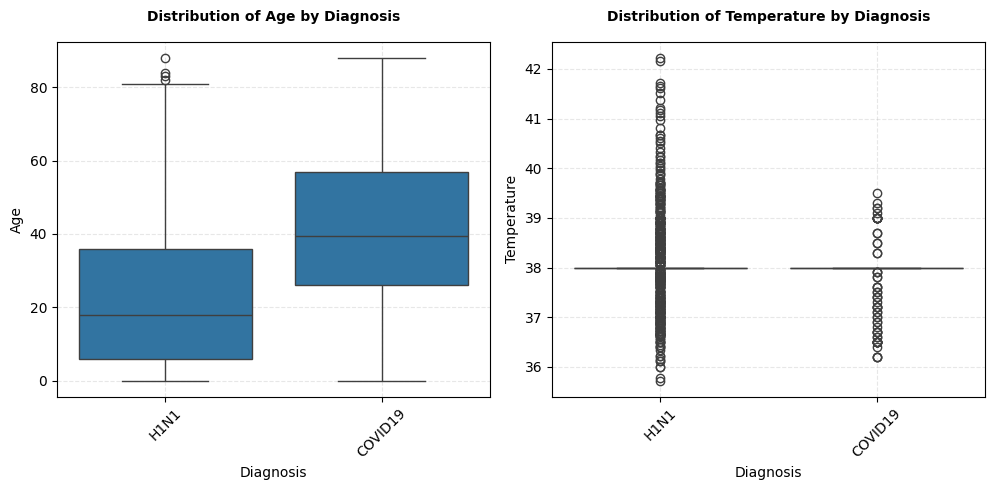

In [33]:
# Create boxplots for each numeric column grouped by Diagnosis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

n_plots = len(numeric_columns)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for idx, column in enumerate(numeric_columns):
    sns.boxplot(x='Diagnosis', y=column, data=df, ax=axes[idx])
    
    axes[idx].set_title(f'Distribution of {column} by Diagnosis',
                       pad=15,
                       fontsize=10,
                       fontweight='bold')
    
    axes[idx].set_xlabel('Diagnosis')
    axes[idx].set_ylabel(column)
    
    axes[idx].grid(True, linestyle='--', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(numeric_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


In [34]:
# Change Yes/No values to True/False, preserving other values
for column in object_columns:
    if df[column].isin(['Yes', 'No']).any():
        df.loc[:, column] = df[column].map({'Yes': True, 'No': False})

In [35]:
df['Diagnosis']

0          H1N1
1          H1N1
2          H1N1
3          H1N1
4          H1N1
         ...   
1472    COVID19
1473    COVID19
1474    COVID19
1475    COVID19
1476    COVID19
Name: Diagnosis, Length: 1392, dtype: object

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [37]:
df_encoded = pd.get_dummies(df, columns=['Sex'])

X = df_encoded.drop('Diagnosis', axis=1)
y = df_encoded['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [38]:
df


,Diagnosis,Age,Sex,Diarrhea,Fever,Coughing,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,67.0,F,False,True,True,False,False,38.111111,False
1,H1N1,29.0,M,False,False,False,False,False,38.000000,False
2,H1N1,22.0,F,False,False,False,False,False,38.000000,False
3,H1N1,20.0,F,False,True,True,False,False,36.555556,True
4,H1N1,21.0,M,False,False,False,False,False,38.000000,False
...,...,...,...,...,...,...,...,...,...,...
1472,COVID19,35.0,M,False,True,True,False,False,38.000000,False
1473,COVID19,51.0,M,False,False,True,False,True,38.000000,False
1474,COVID19,65.0,F,False,True,True,False,False,38.000000,False
1475,COVID19,72.0,M,False,True,True,False,False,38.000000,False


Accuracy: 0.842
Precision: 0.840
Recall: 0.842
F1 Score: 0.841


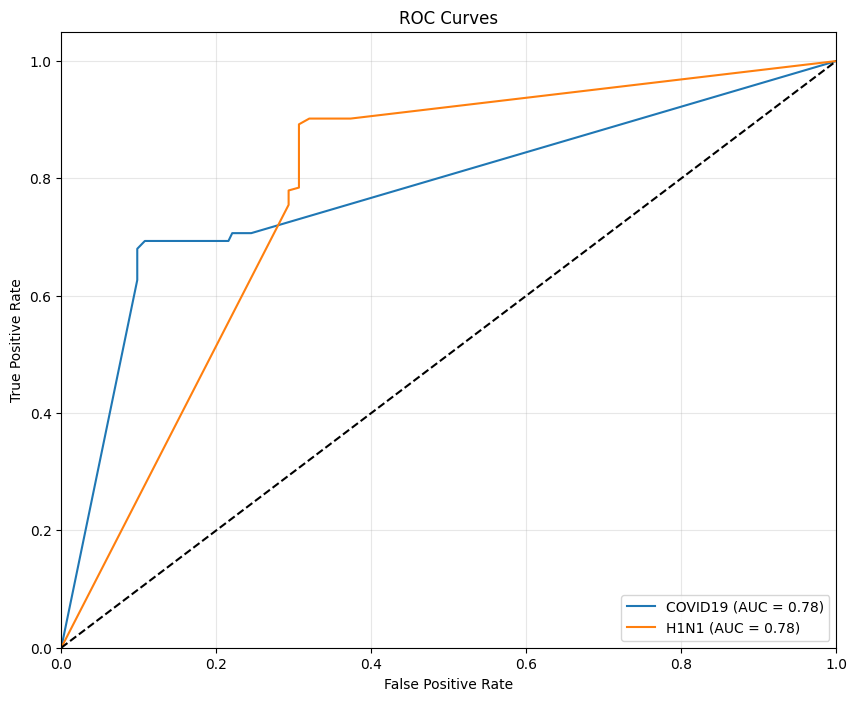

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import numpy as np

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

plt.figure(figsize=(10, 8))

classes = clf.classes_
for i, class_name in enumerate(classes):
    y_test_class = (y_test == class_name).astype(int)
    y_pred_proba = clf.predict_proba(X_test)[:, i]
    
    fpr, tpr, _ = roc_curve(y_test_class, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


## Decision Tree Classifier
 
 Decision tree classifier membuat model berbentuk pohon keputusan untuk klasifikasi berdasarkan fitur-fitur yang ada. Algoritma ini membagi data ke dalam subset berdasarkan ambang batas fitur yang memaksimalkan information gain atau meminimalkan impurity (seperti Gini impurity atau entropy) dalam setiap subset.
 
 Pada setiap node, kriteria pemisahan menggunakan Gini impurity:
 
 $Gini = 1 - \sum_{i=1}^{c} (p_i)^2$
 
 di mana $p_i$ adalah proporsi kelas i dalam node tersebut dan c adalah jumlah kelas.
 
 Prediksi akhir untuk leaf node adalah kelas mayoritas dari data pelatihan dalam node tersebut:
 
 $\hat{y} = \text{mode}(\{y_i : i \in \text{leaf}\})$


## Accuracy
Proporsi prediksi yang benar dari total prediksi:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

di mana:
- TP (True Positive): kasus positif yang diprediksi benar sebagai positif
- TN (True Negative): kasus negatif yang diprediksi benar sebagai negatif  
- FP (False Positive): kasus negatif yang salah diprediksi sebagai positif
- FN (False Negative): kasus positif yang salah diprediksi sebagai negatif

## Precision
Proporsi prediksi positif yang benar:

$Precision = \frac{TP}{TP + FP}$

## Recall
Proporsi kasus positif aktual yang diprediksi benar:

$Recall = \frac{TP}{TP + FN}$

## F1 Score
Rata-rata harmonik dari precision dan recall:

$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

## ROC (Receiver Operating Characteristic) Curve
Kurva yang menunjukkan trade-off antara True Positive Rate (TPR/Recall) dan False Positive Rate (FPR):

$TPR = \frac{TP}{TP + FN}$

$FPR = \frac{FP}{FP + TN}$

## AUC-ROC Score
Area Under the ROC Curve - mengukur kemampuan model untuk membedakan kelas. Nilai 1.0 berarti klasifikasi sempurna, 0.5 berarti klasifikasi acak.
